In [4]:
# Import necessary libraries
import pandas as pd

# Load the predictive maintenance dataset
file_path = 'predictive_maintenance.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
# Check for missing values and get a summary of the dataset
summary = data.describe()
missing_values = data.isnull().sum()

summary, missing_values

(               UDI  Air temperature [K]  Process temperature [K]  \
 count  10000.00000         10000.000000             10000.000000   
 mean    5000.50000           300.004930               310.005560   
 std     2886.89568             2.000259                 1.483734   
 min        1.00000           295.300000               305.700000   
 25%     2500.75000           298.300000               308.800000   
 50%     5000.50000           300.100000               310.100000   
 75%     7500.25000           301.500000               311.100000   
 max    10000.00000           304.500000               313.800000   
 
        Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
 count            10000.000000  10000.000000     10000.000000  10000.000000  
 mean              1538.776100     39.986910       107.951000      0.033900  
 std                179.284096      9.968934        63.654147      0.180981  
 min               1168.000000      3.800000         0.000000    

<ipython-input-6-2896048c05a3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Failure Type', palette='viridis')


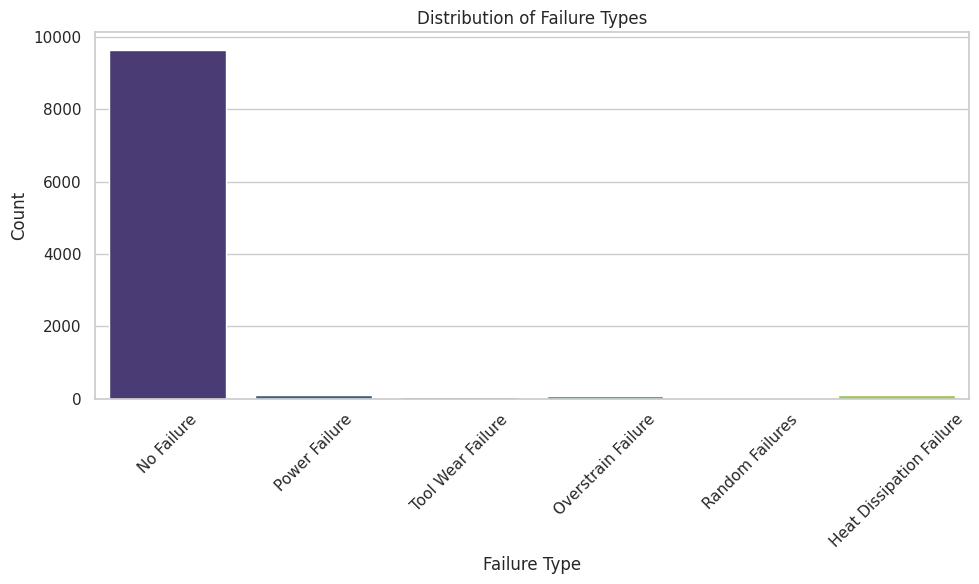

In [6]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a count plot for the Failure Type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Failure Type', palette='viridis')
plt.title('Distribution of Failure Types')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an HTML file
plt.savefig('failure_type_distribution.png')
plt.show()

<ipython-input-7-5853ba1e3766>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Failure Type', y=feature, palette='viridis')
<ipython-input-7-5853ba1e3766>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Failure Type', y=feature, palette='viridis')
<ipython-input-7-5853ba1e3766>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Failure Type', y=feature, palette='viridis')
<ipython-input-7-5853ba1e3766>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

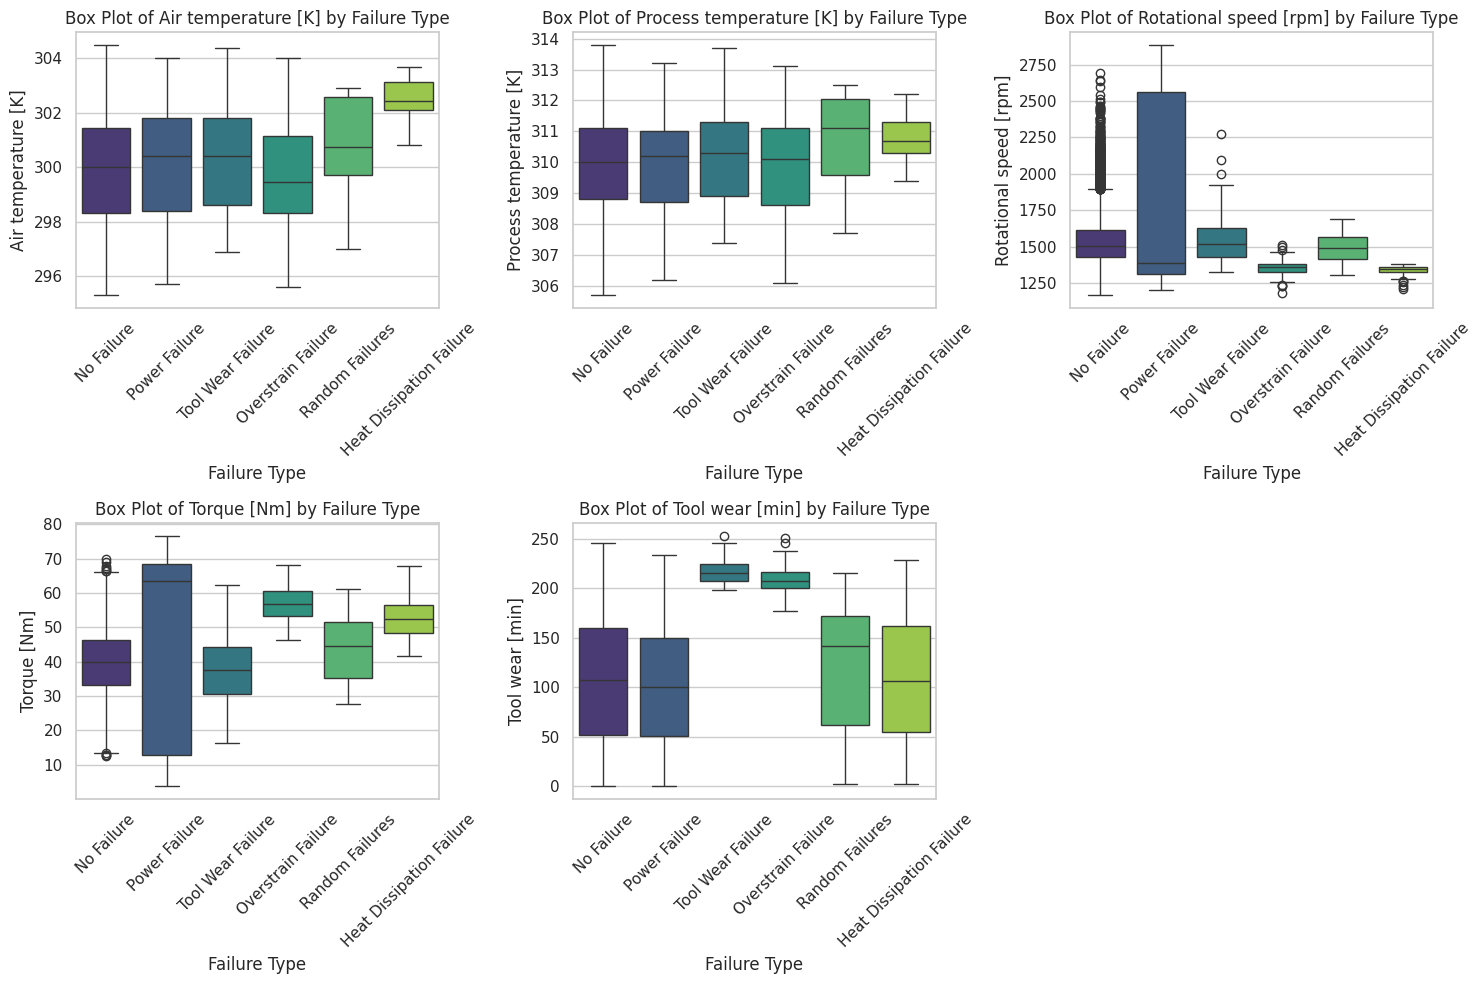

In [7]:
# Create box plots for numerical features against Failure Type
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=data, x='Failure Type', y=feature, palette='viridis')
    plt.title(f'Box Plot of {feature} by Failure Type')
    plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an HTML file
plt.savefig('numerical_features_by_failure_type.png')
plt.show()

In [8]:
# Import necessary libraries for preprocessing and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Failure Type'] = label_encoder.fit_transform(data['Failure Type'])

# Define features and target variable
X = data.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)
y = data['Failure Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Data preprocessing completed successfully.')

Data preprocessing completed successfully.


In [10]:
# Import necessary libraries for model building and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Model training and evaluation completed successfully.')
print('Accuracy:', accuracy)
print('Confusion Matrix:', conf_matrix)
print('Classification Report:', class_report)

Model training and evaluation completed successfully.
Accuracy: 0.9955
Confusion Matrix: [[  15    0    0    0    0    0]
 [   0 1935    0    0    0    0]
 [   1    0   12    0    0    0]
 [   0    0    1   19    0    0]
 [   0    6    0    0    0    0]
 [   0    0    1    0    0   10]]
Classification Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      1.00      1.00      1935
           2       0.86      0.92      0.89        13
           3       1.00      0.95      0.97        20
           4       0.00      0.00      0.00         6
           5       1.00      0.91      0.95        11

    accuracy                           1.00      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.99      1.00      0.99      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


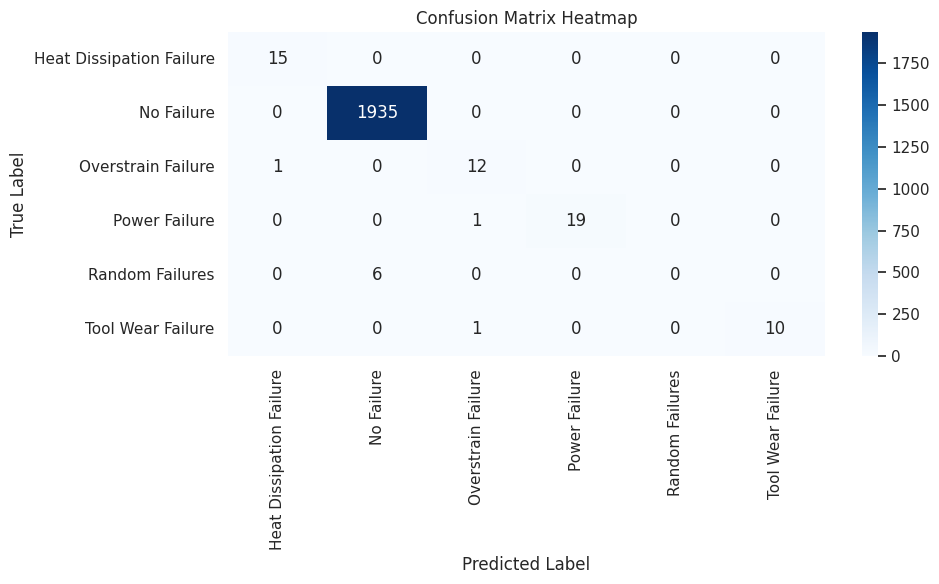

In [11]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Save the plot as an HTML file
plt.savefig('confusion_matrix_heatmap.png')
plt.show()

In [12]:
# Import necessary library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print('Hyperparameter tuning completed successfully.')
print('Best Parameters:', best_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Hyperparameter tuning completed successfully.
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
